In [ ]:
from pathlib import Path

import pandas as pd

DATA_PATH = Path("data/Expenses-2025.11.csv")
EXPECTED_COLUMNS = [
    "Posted Date",
    "Payee",
    "Amount",
    "ABS Amount",
    "Source",
    "Bas-Lux",
    "Category",
]

df = pd.read_csv(
    DATA_PATH,
    encoding="utf-8-sig",
    thousands=",",
)
df["Posted Date"] = pd.to_datetime(df["Posted Date"].str.strip(), format="%m/%d/%y")
df.columns = df.columns.str.strip()

missing_columns = sorted(set(EXPECTED_COLUMNS) - set(df.columns))
unexpected_columns = sorted(set(df.columns) - set(EXPECTED_COLUMNS))

if missing_columns or unexpected_columns:
    raise ValueError(
        "Column mismatch detected.\n"
        f"Missing: {missing_columns or 'None'}\n"
        f"Unexpected: {unexpected_columns or 'None'}"
    )

expenses_df = df[~df["Category"]
                 .isin([
                     "Transfer", 
                     "Credit Card Payment", 
                     "0", 
                     "Income, Investment"
                     ])].copy()

Category,Auto,Bank Fees,Boat,Cash,Charitable contributions,Clothing,Dining,Enrichment,Extracirricular,Gardener,...,R&R,SYC,Subscriptions / Digital,Travel,Utilities,Van,boat,clothing,groceries,hardware technology
month,,,,,,,,,,,,,,,,,,,,,
2024-12,0.00,0.00,0.00,0.00,0.00,295.75,180.10,0.00,194.79,0.00,...,0.00,0.00,28.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2025-01,332.36,405.12,60.00,0.00,200.00,470.88,2614.15,0.00,220.53,0.00,...,168.62,0.00,533.97,2216.71,1033.52,750.00,0.00,0.00,0.00,20.97
2025-02,183.78,304.72,60.00,0.00,250.00,520.70,1327.10,0.00,72.57,0.00,...,27.59,0.00,296.64,0.00,1497.91,2843.24,0.00,0.00,0.00,0.00
2025-03,3490.01,268.44,60.00,139.60,1918.61,4419.07,1527.82,0.00,0.00,0.00,...,0.00,0.00,327.42,4963.22,1122.03,0.00,0.00,0.00,0.00,0.00
2025-04,415.96,112.99,60.00,0.00,0.00,1022.51,2204.90,0.00,96.99,1350.00,...,174.59,0.00,163.14,1170.13,2347.68,0.00,0.00,0.00,0.00,0.00
2025-05,994.67,246.03,140.00,0.00,1200.00,1022.90,2271.56,0.00,3191.22,1199.58,...,218.50,0.00,710.57,3924.85,968.76,0.00,0.00,0.00,0.00,3.85
2025-06,1417.84,21.35,70.00,0.00,0.00,132.70,1460.54,0.00,0.00,0.00,...,0.00,0.00,267.23,9312.26,1126.97,1621.63,0.00,0.00,0.00,82.77
2025-07,766.61,0.23,70.00,0.00,108.00,1536.77,967.37,155.74,0.00,1750.00,...,0.00,96.17,133.42,689.62,1041.92,9605.53,0.00,0.00,29.78,185.66
2025-08,1543.75,124.62,415.36,1802.60,101.00,2955.32,3306.24,967.82,178.30,0.00,...,0.00,199.11,302.14,16466.51,1274.12,870.14,96.90,348.43,0.00,610.98


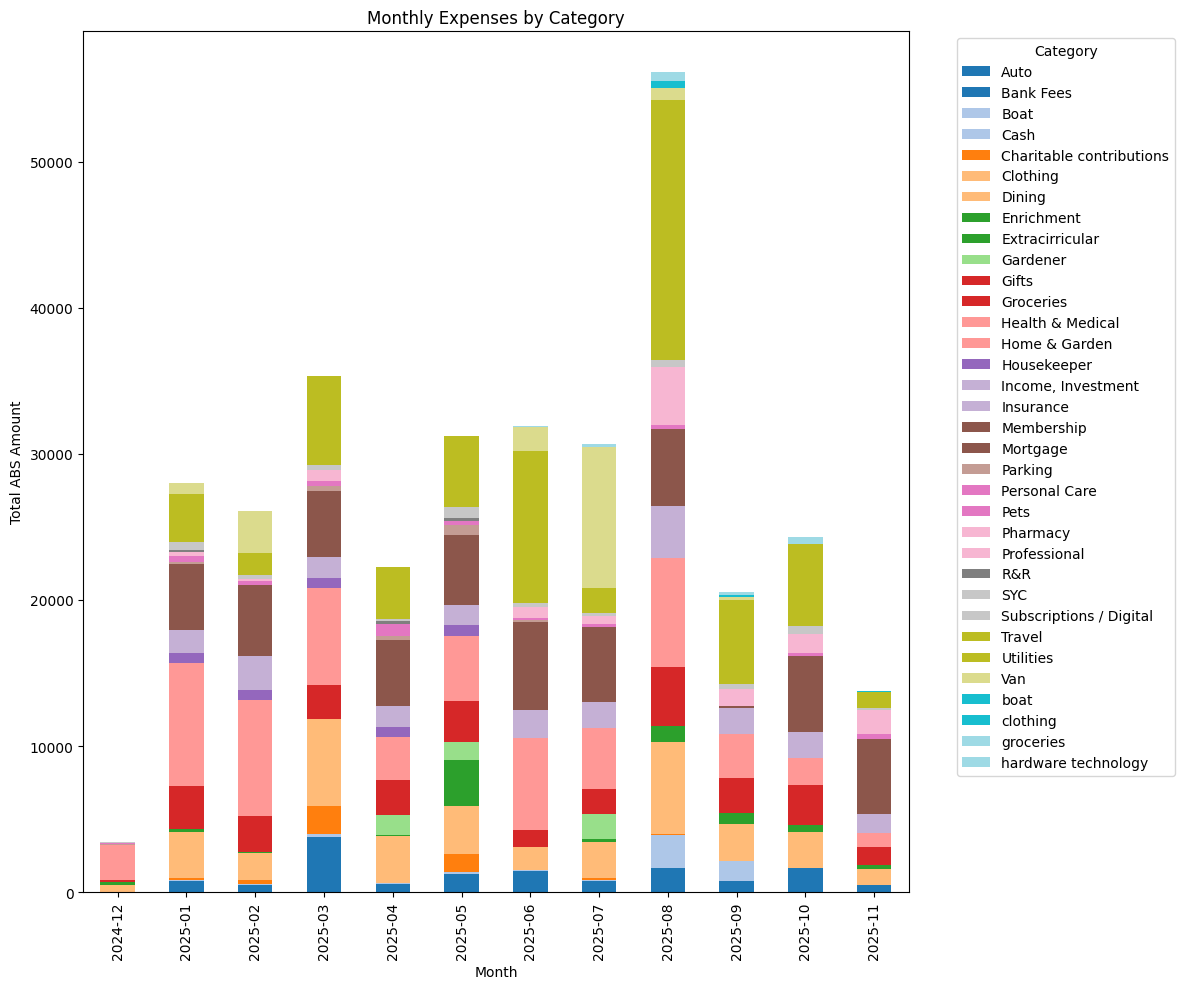

In [7]:
import matplotlib.pyplot as plt
from IPython.display import display

monthly_category = (
    expenses_df.assign(month=df["Posted Date"].dt.to_period("M"))
    .groupby(["month", "Category"], dropna=False)["ABS Amount"]
    .sum()
    .unstack(fill_value=0)
    .sort_index()
)

# remove any categories that have less than $100 total expenses in a month
monthly_category = monthly_category.loc[
    :, monthly_category.sum() >= 100
] 

# show only the last 4 months of data
# monthly_category = monthly_category.tail(4)

ax = monthly_category.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 10),
    colormap="tab20",
)
ax.set_title("Monthly Expenses by Category")
ax.set_xlabel("Month")
ax.set_ylabel("Total ABS Amount")
ax.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

monthly_category


In [5]:
import plotly.express as px
from IPython.display import HTML

# Build the same dataset used for the Matplotlib stacked bar chart
plotly_data = (
    monthly_category.reset_index()
    .melt(id_vars='month', var_name='Category', value_name='ABS Amount')
)
plotly_data['month'] = plotly_data['month'].astype(str)

fig = px.bar(
    plotly_data,
    x='month',
    y='ABS Amount',
    color='Category',
    labels={'month': 'Month'},
    title='Monthly Expenses by Category (Interactive)',
)
fig.update_layout(barmode='stack', height=800, width=1200, legend_title='Category')

HTML(fig.to_html(include_plotlyjs='cdn', full_html=False))


In [ ]:
total_by_category = (
    expenses_df.groupby("Category", dropna=False)["ABS Amount"]
    .sum()
    .reset_index()
)
fig = px.treemap(
    total_by_category,
    path=['Category'],
    values='ABS Amount',
    title='Total Expenses by Category Treemap',
)
fig.update_layout(height=800, width=1200)
HTML(fig.to_html(include_plotlyjs='cdn', full_html=False))
